In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [5]:
file_list = glob("./data/*.csv")
file_list

['./data\\conversionRates.csv',
 './data\\freeformResponses.csv',
 './data\\multipleChoiceResponses.csv',
 './data\\schema.csv']

In [7]:
# multiple choice questions(mcq)
mcq = pd.read_csv(file_list[3])
mcq.shape

(290, 3)

In [8]:
mcq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Column    290 non-null    object
 1   Question  290 non-null    object
 2   Asked     290 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


In [9]:
mcq.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [10]:
# multiple choice answer(mca)
mca = pd.read_csv(file_list[2], encoding="cp437", low_memory=False)
mca.shape

(16716, 228)

In [11]:
mca.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [12]:
mca.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
mca["GenderSelect"].value_counts()

Male                                                 13610
Female                                                2778
A different identity                                   159
Non-binary, genderqueer, or gender non-conforming       74
Name: GenderSelect, dtype: int64

<Axes: >

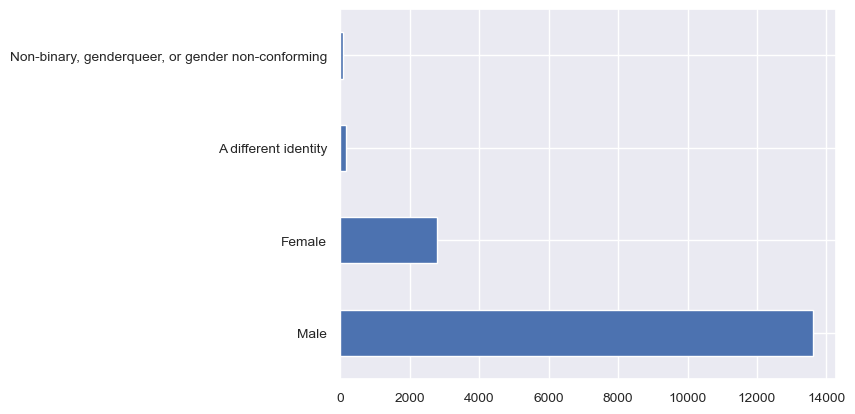

In [52]:
sns.set(font_scale=0.9)
mca["GenderSelect"].value_counts().plot.barh()

<Axes: xlabel='count', ylabel='GenderSelect'>

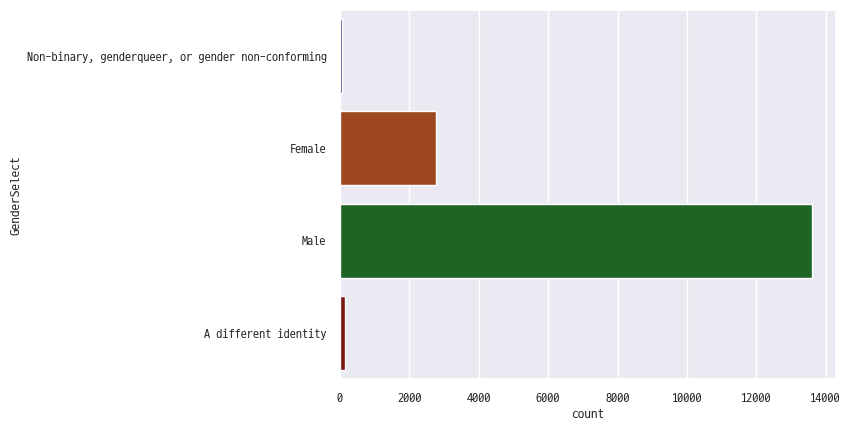

In [62]:
# plt.xticks(rotation=30)
sns.set(font="D2Coding", font_scale=0.8)
sns.countplot(mca, y="GenderSelect", palette="dark")

In [48]:
country_df = pd.DataFrame(mca["Country"].value_counts())
country_df["국가"] = country_df.index
country_df.rename({"Country": "응답수"}, axis=1, inplace=True)
country_df.reset_index(drop=True, inplace=True)
country_df.head()

,응답수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom


<Axes: xlabel='응답수', ylabel='국가'>

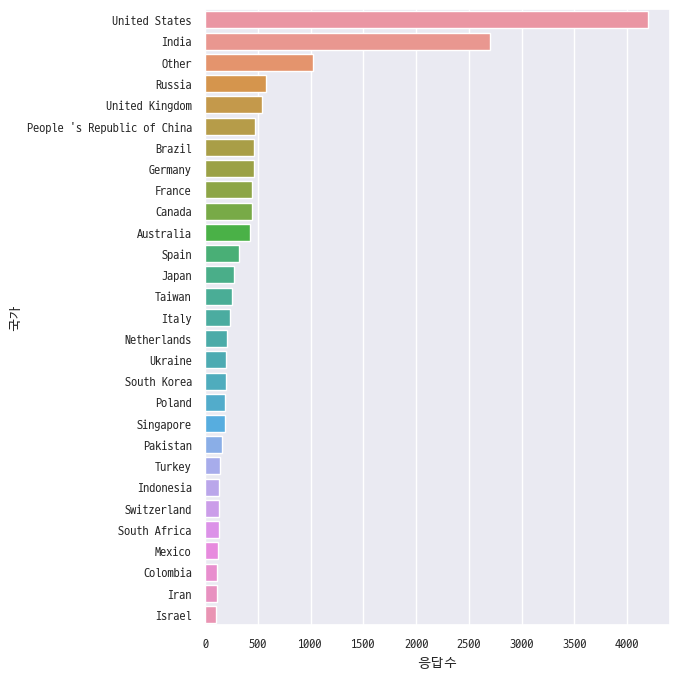

In [71]:
plt.figure(figsize=(6, 8))
# plt.xticks(rotation=30)
sns.barplot(country_df[(country_df["응답수"] >= 100)] , y="국가", x="응답수")

In [72]:
mca["Age"].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

In [88]:
mca.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [93]:
list(mca.loc[:, mca.isnull().sum() == 0].columns)

['EmploymentStatus']

In [ ]:
pd.describe_option()

In [104]:
# pd.set_option("display.max_rows", None)
mca["Age"].value_counts()

25.0     969
24.0     898
26.0     886
27.0     842
23.0     839
30.0     778
28.0     761
29.0     731
22.0     694
31.0     597
21.0     584
35.0     577
32.0     560
34.0     531
33.0     530
36.0     398
20.0     395
37.0     384
40.0     366
38.0     354
39.0     320
42.0     255
45.0     226
41.0     223
44.0     199
43.0     198
19.0     193
50.0     189
47.0     166
48.0     158
46.0     144
52.0     132
49.0     132
51.0     100
55.0      91
57.0      88
53.0      83
18.0      78
56.0      76
54.0      74
60.0      56
58.0      55
59.0      49
63.0      42
17.0      42
61.0      38
62.0      29
65.0      28
66.0      24
16.0      24
70.0      22
64.0      21
67.0      19
69.0      16
68.0      16
15.0      13
0.0       10
100.0     10
72.0       7
14.0       6
73.0       6
71.0       5
75.0       5
80.0       4
1.0        4
77.0       4
76.0       3
99.0       3
11.0       3
13.0       3
74.0       3
79.0       2
3.0        2
6.0        2
10.0       1
12.0       1
4.0        1

In [112]:
# mca.pivot_table("EmploymentStatus", index="Age", aggfunc="count")
mca.pivot_table("EmploymentStatus", index="Age", aggfunc="count").sort_values("EmploymentStatus", ascending=False)

,EmploymentStatus
Age,
25.0,969
24.0,898
26.0,886
27.0,842
23.0,839
30.0,778
28.0,761
29.0,731
22.0,694


<Axes: xlabel='Age', ylabel='Count'>

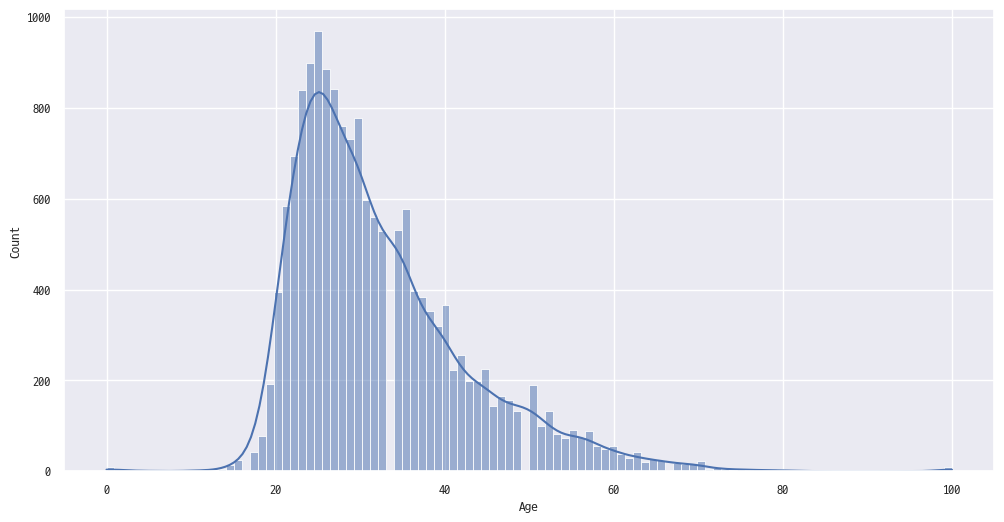

In [82]:
plt.figure(figsize=(12, 6))
sns.histplot(mca, x="Age", kde=True)